# Visualization of the Quantized EM field

We know from the mathematical formalism, that each excitation mode of the field can be interpreted as an independent harmonic oscillator. If we represent each of these HO with an arrow, we can "visualize" that quantization of the field.

## 1D Case

---

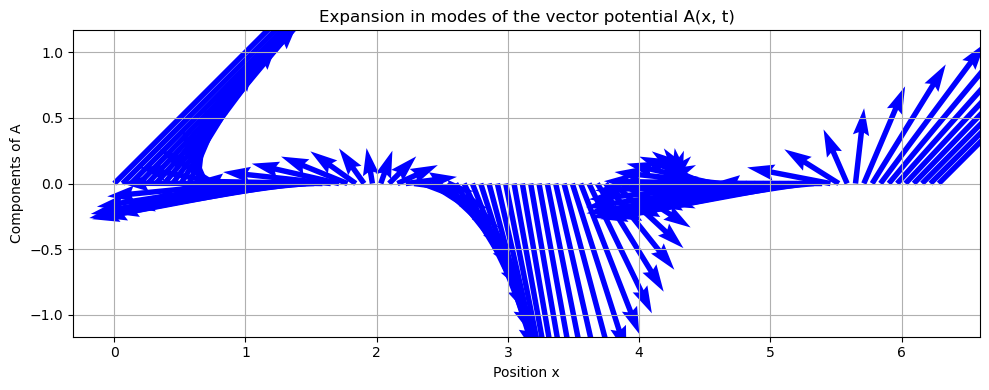

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the visualization
L = 2 * np.pi  # spatial domain length
N = 100        # number of spatial points
x = np.linspace(0, L, N)
t = 0          # fixed time for the visualization

# We define some wave vectors k and their polarizations
k_values = [1, 2, 3]
polarizations = [np.array([0, 1]), np.array([1, 0]), np.array([1, 1]) / np.sqrt(2)]

# We initialize the vector potential A(x, t)
A_x = np.zeros_like(x)
A_y = np.zeros_like(x)

# We add the modes as plane waves with different k and polarizations
for k, e in zip(k_values, polarizations):
    omega = k  # in natural units, ω = |k|
    phase = k * x - omega * t
    A_x += e[0] * np.cos(phase)
    A_y += e[1] * np.cos(phase)

# Visualization of the vector field A(x, t)
plt.figure(figsize=(10, 4))
plt.quiver(x, np.zeros_like(x), A_x, A_y, angles='xy', scale_units='xy', scale=1, color='blue')
plt.title("Expansion in modes of the vector potential A(x, t)")
plt.xlabel("Position x")
plt.ylabel("Components of A")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


## 3D (orthogonal) case

---

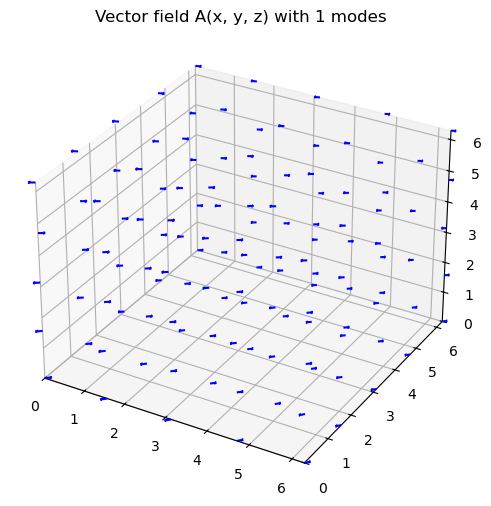

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


# Create a 3D grid
grid_size = 5
x = np.linspace(0, 2*np.pi, grid_size)
y = np.linspace(0, 2*np.pi, grid_size)
z = np.linspace(0, 2*np.pi, grid_size)
X, Y, Z = np.meshgrid(x, y, z)

# Initialize the vector field
def generate_field(num_modes):
    Ax = np.zeros_like(X)
    Ay = np.zeros_like(Y)
    Az = np.zeros_like(Z)

    for _ in range(num_modes):
        # Random wave vector k
        k = np.random.uniform(0.5, 2.0, size=3)
        k_norm = np.linalg.norm(k)
        k_hat = k / k_norm

        # Generate a polarization vector orthogonal to k
        # We use the cross product with an arbitrary non-parallel vector
        arbitrary = np.array([1, 0, 0]) if abs(k_hat[0]) < 0.9 else np.array([0, 1, 0])
        polarization = np.cross(k_hat, arbitrary)
        polarization /= np.linalg.norm(polarization)

        # Spatial phase
        phase = k[0]*X + k[1]*Y + k[2]*Z
        Ax += polarization[0] * np.cos(phase)
        Ay += polarization[1] * np.cos(phase)
        Az += polarization[2] * np.cos(phase)

    return Ax, Ay, Az

# Create the figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
quiver = None

# Update function for the animation
def update(frame):
    global quiver
    ax.clear()
    ax.set_title(f'Vector field A(x, y, z) with {frame+1} modes')
    ax.set_xlim([0, 2*np.pi])
    ax.set_ylim([0, 2*np.pi])
    ax.set_zlim([0, 2*np.pi])
    Ax, Ay, Az = generate_field(frame + 1)
    quiver = ax.quiver(X, Y, Z, Ax, Ay, Az, length=0.3, normalize=True, color='blue')

# Create animation
anim = FuncAnimation(fig, update, frames=10, interval=1000)

HTML(anim.to_jshtml())

# Save as gif
anim.save("vector_field_3D.gif", writer='pillow')

# Show the first frame
update(0)
plt.savefig("vector_field_3D_frame1.png")
plt.show()

HTML(anim.to_jshtml())
